# Einleitung
Die DGL dieses Modells wurde nicht mit Vensim gelöst, sondern.
Es wurde mit der Programmiersprache Julia, die Matlab sehr ähnlich aber open-source ist gelöst.
Dies weil ich gerade diese lerne, falls nötig werde ich aber noch das Modell aus Vensim nachreichen.

# Verwendete Differentialgleichung

\begin{equation}
\frac{du}{dt} =cpd*u*ip*(dang-u)/pop
\end{equation}
pop= Population, cpd=Kontake Pro Tag, u= Infecteds, ip= Infectionprobability, dang=Suspectibles
# Implementierte Differentialgleichung




In [8]:
using DifferentialEquations
using Plots
function epimod(pop,dang,cpd,ip,u0,tspan)

## Lösen der ODE f(u,p,t)
f(u,p,t)=cpd*u*(dang-u)/pop*ip

prob = ODEProblem(f,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-2,abstol=1e-2)
## andere var
so=sol.u
sus=-so.+21
Inf_r=1/pop*cpd*so.*sus
    
## Graphische darstellung
plot(sol.t,so,linewidth=5,title="Epidemic Modell",
     xaxis="Time (t) in days",yaxis="u(t) (in persons)",label="infecteds",fmt = :png) # legend=false
plot!(sol.t,sus,linewidth=5,label="Susceptibles")
plot!(sol.t,Inf_r,linewidth=5,label="Infectionratio")
    
end



 

epimod (generic function with 1 method)

# Base Parameter

  0.002806 seconds (5.07 k allocations: 367.266 KiB)


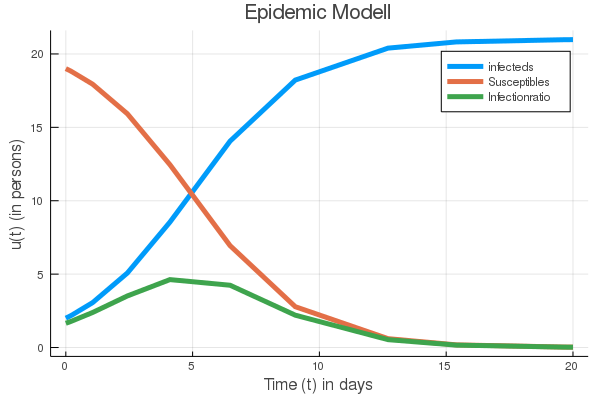

In [17]:
## Eingabe
#u ist die ableitung der Infizierten
pop=23.0
dang=21.0  #menge an infizierten plus risikogruppe
cpd=1.0   #Kontakte pro Tag
ip=0.5 #ansteckungswahrscheinlichkeit
u0=2.0 #startwert kranker
tspan=(0.0,20.0)
epimod(pop,dang,cpd,ip,u0,tspan)# Aufruf des Modell
@time epimod(pop,dang,cpd,ip,u0,tspan)



Dies entspricht dem vorgegebenen Parametersatz. Nach ca. 15 Tagen ist die ganze Bevölkerung durchseucht. Ein rascher Anstieg ist auch Erkennbar.

# Zweiter Parametersatz ip=0.1

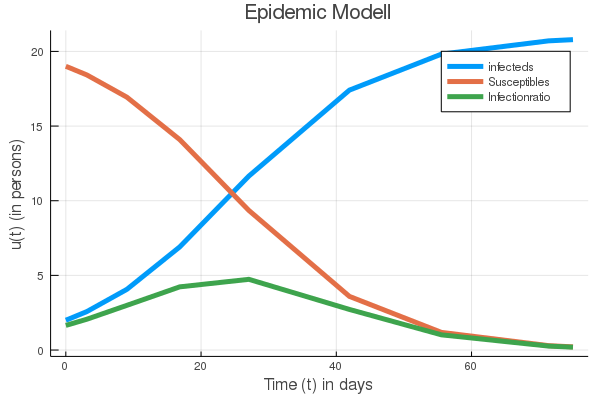

In [21]:
## Eingabe
#u ist die ableitung der Infizierten
pop=23.0
dang=21.0  #menge an infizierten plus risikogruppe
cpd=1.0   #Kontakte pro Tag
ip=0.1 #ansteckungswahrscheinlichkeit
u0=2.0 #startwert kranker
tspan=(0.0,75.0)
epimod(pop,dang,cpd,ip,u0,tspan)# Aufruf des Modell


Die Ansteckungswahrscheinlichkeit wurde um den Faktor 5 reduziert und wie zu erwarten ging die durchseuchung etwa fünfmal so lange. Dies ergeht auch der verwendeten DGl hervor welche verwendet wurde.


# Dritter Parametersatz u0=5

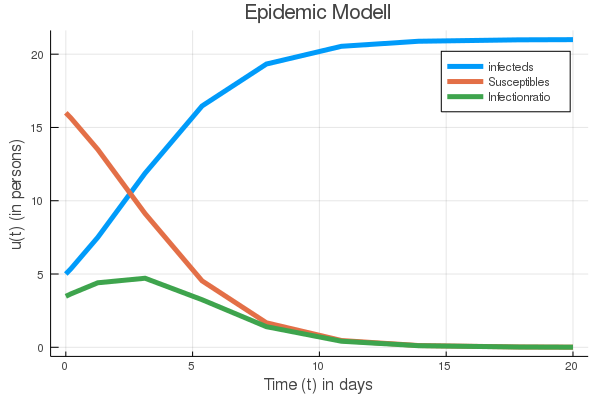

In [22]:
## Eingabe
#u ist die ableitung der Infizierten
pop=23.0
dang=21.0  #menge an infizierten plus risikogruppe
cpd=1.0   #Kontakte pro Tag
ip=0.5 #ansteckungswahrscheinlichkeit
u0=5.0 #startwert kranker
tspan=(0.0,20.0)
epimod(pop,dang,cpd,ip,u0,tspan)# Aufruf des Modell

Bei dem dritten Satz wurde die Ansteckungswahrscheinlichkeit wieder Zurückgesetzt. Hier wurde aber u0 erhöht. Dies hat einen Offset nache oben zur Folge und somit wird der Endzustand früher erreicht. 